<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##CS6501 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###CS6501_Assignment_2

In [ ]:
#@title Current Date
Today = '2021-10-17' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_1 = "17230004   |   Eoin Halpin" #@param {type:"string"}
Student_2 = "17246067   |   James Larkin" #@param {type:"string"}
Student_3 = "17238889   |   Karl Mullane" #@param {type:"string"}
Student_4 = "17236444   |   Sean Mortimer" #@param {type:"string"}
Student_5 = "16170571   |   Gerard Holian" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Introduction**

## **1.1 Background**

The aim of this report is to address imbalanced datasets and classification problems. Within the report, one synthetic dataset and two 'real-world' datasets (iris and creditcard) will be utilised. The synthetic data will be created with an inbalance, while the creditcard data is already imbalaced. The iris data will be altered to create an inbalance. 

Undersampling, Oversampling and Penalise Algorithm techniques will be deployed to alter the data. A state-of-the-art machine learning method called XGBoost will be applied as the baseline classifier model, and compared against other successful methods discussed in the previous assignments.


## **1.2 Methodology**

###1.2.1 Imbalanced Datasets

An imbalanced dataset is a dataset within which one class is much more frequent than the other. In real - life scenarios, imbalanced data is the norm. It would be extremely rare "that the events of interest have equal or even similar frequency in the data" (Muller and Guido, 2016). When doing machine learning in the real world, imbalanced classes/datasets are a common problem that, if left unaddressed, would reduce the performance of a model. (Albon, 2018). 

Undersampling can be used to balance the class distribution of a dataset that is imbalanced. Undersampling itself refers to a set of techniques used to balance imbalanced datasets (Brownlee, 2021). The approach we have taken is The Near Miss algorithm. The Near Miss algorithm balances the data by "looking at the class distribution and randomly eliminating samples from the larger class" (Madhukar, 2020). 

To address the problem of an imbalanced dataset, oversampling can also be used. Oversampling "duplicates examples from the minority class in the training dataset" (Brownlee, 2021). Sometimes this can result in overfitting which happens when a model is fit too closely to the nuances of the training set. While this model works very well on the training set, it may have difficulty when it comes to new data (Muller and Guido, 2016). 

Resampling methods such as undersampling and oversampling are both focused on balancing the dataset. Undersampling and oversampling both seek to achieve the same goal, they just do it in different ways. "Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class" (Brownlee, 2021). In this assignment we are going to use both the Near Miss undersampling method in an attempt to balance the dataset and an oversample strategy.

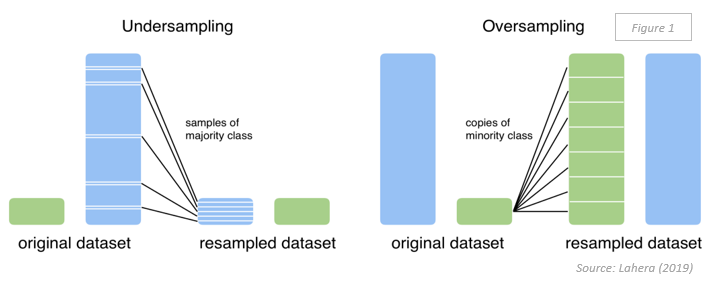

XGBoost is a Python package and is useful if you want to apply gradient boosting to a large scale problem. XGBoost is similar to the Random Forest Classifier in that it is a tree - based model. It is a powerful model and is widely used for supervised learning. However, there are some drawbacks associated with it such as it sometimes it requires "careful tuning of the parameters and may take a long time to train" (Muller and Guido, 2016). 

In this assignment we are going to compare the results of the XGBClassifier against the results of the methods learnt in previous weeks such as Logistic Regression, Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), Random Forest Classifier and a Penalise Algorithm.

As XGBoost is an ensemble technique, an initial model (base learner) must be defined to predict the target variable $y$. Further models can then be derived from here through combinations of weak learners. The purpose of boosting is to create new base learners while reducing residuals in the process. These base learners are the regression trees in the ensemble model. Tianqi Chen, who co-created the library XGBoost used the following ensemble tree as an example of the process (Chen and Guestrin, 2016).

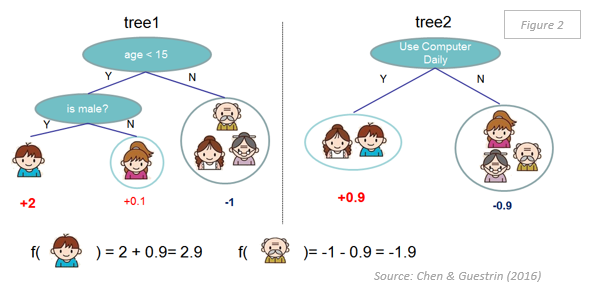

The final prediction for a given example is the sum of predictions from each tree (Chen and Guestrin, 2016).  
The first model is initialised by minimising the mean squared error (MSE) (Sundaram, 2021).  

$$f_{0}(x) = \textrm{arg min}_{\gamma} \sum \limits _{i=1} ^{N} L(y_{i}, \gamma)$$

$$r_{im} = - \displaystyle \Bigg[\frac{\partial L(y_{i}, f(x_{i}))}{\partial f(x_{i})}\Bigg]_{f=f_{m−1}}$$

The MSE is then differentiated with respect to $y$ to minimise the residuals. This gives us the following result and is used as a starting point $F_0(x)$ for boosting.

$$f_0(x) = \frac{\sum\limits_{i=1} ^{n}y_i}{n}$$

Intuitively, $y_i – f_0(x)$ gives us the new residual errors for our observations and we can now use this information to find $h_1(x)$. This computes the mean of the residuals found from our initial model and our new model (tree) can be derived by summing $h_1(x)$ and $f_0(x)$ to give us $f_1(x)$.

$$f_1(x) \leftarrow f_0(x) + h_1(x)$$  
$$f_2(x) \leftarrow f_1(x) + h_2(x)$$  
$$f_m(x) = F_{m-1} (x) + h_m(x)$$

This process is iterated $m$ times until the residuals have been minimised as much as possible. Each step of the process combines the weaker learners to create a stronger learner. This improves the accuracy of predictions within the model. The number of iterations in this boosting method can be important to prevent the issue of overfitting. Therefore, validation techniques such a k-fold cross validation can be employed to find an optimal cut off point (Sundaram, 2021). The default in the XGBoost library is set to 100 trees which we have deemed to be an appropriate stopping criteria for our three datasets (n.d.).  
Now that XGBoosting has been explained, it will be applied to three datasets synthetic, Iris and credit card fraud. The results will also be compared to those from alternative predictive algorithms as previously mentioned.



##Libraries

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold


# **2. Imbalanced Synthetic Dataset**

## **2.1 Data Preparation**
No data preparation required as it is a synthetic dataset and no real world dataset had to be loaded in. See section 2.2 for the creation of the synthtetic imbalanced dataset.

## **2.2 Imbalanced**

In [ ]:
## synthetic imbalanced classification problem

# number of samples
N = 1000
# number of classes
C = 2
# number of features
M = 2
# weights
w1 = 0.90
w2 = 1 - w1
# Generate a random n-class classification problem
X, y = make_classification(n_samples=N, n_features=M, n_redundant=0, n_clusters_per_class=1, weights=[w1, w2], flip_y=0)


In [ ]:
#count classes and its samples 
count_class = Counter(y)
print(count_class)


Counter({0: 901, 1: 99})


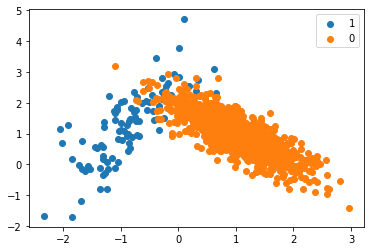

In [ ]:
#scatter plot
for label, _ in count_class.items():
  row = where(y == label)[0]
  pyplot.scatter(X[row, 0], X[row, 1], label=str(label))

pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


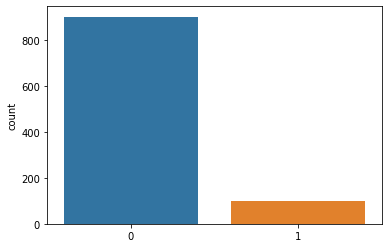

In [ ]:
#histogram
sns.countplot(y)











###2.2.1 XGBClassifier - Imbalanced Dataset

In [ ]:
#train and test sets
#test size factor
TS = 0.50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, stratify=y)

In [ ]:
# compare XGBClassifier against the previous methods

#imports
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#create model
from xgboost import XGBClassifier

#fit the model
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predictions
y_pred = XGBC.predict(X_test)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.954
Precision: 0.846
Recall: 0.660
F-measure: 0.742


### 2.2.2 Logistic Regression - Imbalanced Dataset

In [ ]:
#create model
LR = LogisticRegression(solver='liblinear')
#fit the model
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predictions
y_pred = LR.predict(X_test)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.956
Precision: 0.868
Recall: 0.660
F-measure: 0.750


### 2.2.3 Support Vector Machine - Imbalanced Dataset

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear')
#fit the model 
svm.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions
y_pred = svm.predict(X_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.956
Precision: 0.868
Recall: 0.660
F-measure: 0.750


### 2.2.4 Gaussian Naive Bayes - Imbalanced Dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
#fit the model
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predictions
y_pred = GNB.predict(X_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.960
Precision: 0.800
Recall: 0.800
F-measure: 0.800


### 2.2.5 Random Forest - Imbalanced Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y_pred = RF.predict(X_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.956
Precision: 0.833
Recall: 0.700
F-measure: 0.761


## **2.3 Undersampling**

##Undersample Strategy - Near Miss



In [ ]:
from imblearn.under_sampling import NearMiss
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

nm = NearMiss()

X_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 901, 1: 99})
Resample dataset shape: Counter({0: 99, 1: 99})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


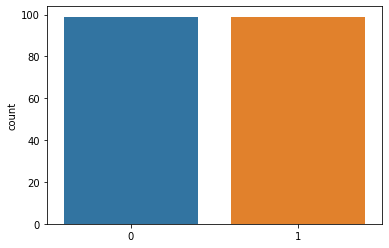

In [ ]:
# histogram
sns.countplot(y_nm)

### 2.3.1 XGBClassifier - Undersampling - Near Miss

In [ ]:
# train and test sets
# test size factor
TS = 0.50
X_nmtrain, X_nmtest, y_nmtrain, y_nmtest = train_test_split(X_nm, y_nm, test_size=TS, stratify=y_nm)

In [ ]:
#create model
from xgboost import XGBClassifier

#fit the model
XGBC = XGBClassifier()
XGBC.fit(X_nmtrain, y_nmtrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_nmpred = XGBC.predict(X_nmtest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_nmtest, y_nmpred))
print('Precision: %.3f' % precision_score(y_nmtest, y_nmpred))
print('Recall: %.3f' % recall_score(y_nmtest, y_nmpred))
print('F-measure: %.3f' % f1_score(y_nmtest, y_nmpred))

Accuracy: 0.747
Precision: 0.766
Recall: 0.720
F-measure: 0.742


### 2.3.2 Logistic Regression - Undersampling - Near Miss

In [ ]:
# create model
LR = LogisticRegression(solver='liblinear')
# fit model
LR.fit(X_nmtrain, y_nmtrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y_nmpred = LR.predict(X_nmtest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_nmtest, y_nmpred))
print('Precision: %.3f' % precision_score(y_nmtest, y_nmpred))
print('Recall: %.3f' % recall_score(y_nmtest, y_nmpred))
print('F-measure: %.3f' % f1_score(y_nmtest, y_nmpred))

Accuracy: 0.778
Precision: 0.833
Recall: 0.700
F-measure: 0.761


### 2.3.3 Support Vector Machine - Undersampling - Near Miss

In [ ]:
#create model
from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear')
#fit the model 
svm.fit(X_nmtrain, y_nmtrain)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions
y_nmpred = svm.predict(X_nmtest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_nmtest, y_nmpred))
print('Precision: %.3f' % precision_score(y_nmtest, y_nmpred))
print('Recall: %.3f' % recall_score(y_nmtest, y_nmpred))
print('F-measure: %.3f' % f1_score(y_nmtest, y_nmpred))

Accuracy: 0.758
Precision: 0.810
Recall: 0.680
F-measure: 0.739


### 2.3.4 Gaussain Naive Bayes - Undersampling - Near Miss

In [ ]:
#create model 
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
#fit the model
GNB.fit(X_nmtrain, y_nmtrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predictions
y_nmpred = GNB.predict(X_nmtest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_nmtest, y_nmpred))
print('Precision: %.3f' % precision_score(y_nmtest, y_nmpred))
print('Recall: %.3f' % recall_score(y_nmtest, y_nmpred))
print('F-measure: %.3f' % f1_score(y_nmtest, y_nmpred))

Accuracy: 0.798
Precision: 0.857
Recall: 0.720
F-measure: 0.783


### 2.3.5 Random Forest - Undersampling - Near Miss

In [ ]:
#create model 
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RF.fit(X_nmtrain, y_nmtrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y_nmpred = RF.predict(X_nmtest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_nmtest, y_nmpred))
print('Precision: %.3f' % precision_score(y_nmtest, y_nmpred))
print('Recall: %.3f' % recall_score(y_nmtest, y_nmpred))
print('F-measure: %.3f' % f1_score(y_nmtest, y_nmpred))

Accuracy: 0.758
Precision: 0.771
Recall: 0.740
F-measure: 0.755


## **2.4 Oversampling**

In [ ]:
## oversample strategy

# oversample shorter class
factor2 = 0.5
oversample = SMOTE(sampling_strategy=factor2)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# verify class distribution
print(Counter(y_over))

Counter({0: 901, 1: 450})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


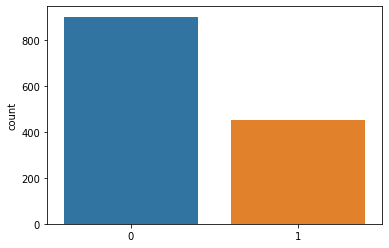

In [ ]:
# histogram
sns.countplot(y_over)

### 2.4.1 XGBClassifier - Oversample Strategy

In [ ]:
# train and test sets
# test size factor
TS = 0.50
X_Otrain, X_Otest, y_Otrain, y_Otest = train_test_split(X_over, y_over, test_size=TS, stratify=y_over)

In [ ]:
#create model
from xgboost import XGBClassifier

#fit the model
XGBC = XGBClassifier()
XGBC.fit(X_Otrain, y_Otrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#predictions
y_pred = XGBC.predict(X_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred))
print('Precision: %.3f' % precision_score(y_Otest, y_pred))
print('Recall: %.3f' % recall_score(y_Otest, y_pred))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred))

Accuracy: 0.944
Precision: 0.931
Recall: 0.898
F-measure: 0.914


### 2.4.2 Logistic Regression - Oversample Strategy 

In [ ]:
# create model
LR = LogisticRegression(solver='liblinear')
# fit model
LR.fit(X_Otrain, y_Otrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predictions
y_pred = LR.predict(X_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred))
print('Precision: %.3f' % precision_score(y_Otest, y_pred))
print('Recall: %.3f' % recall_score(y_Otest, y_pred))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred))

Accuracy: 0.929
Precision: 0.919
Recall: 0.862
F-measure: 0.890


### 2.4.3 Support Vector Machine - Oversample Strategy 

In [ ]:
#create model
from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear')
#fit the model 
svm.fit(X_Otrain, y_Otrain)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions
y_pred = svm.predict(X_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred))
print('Precision: %.3f' % precision_score(y_Otest, y_pred))
print('Recall: %.3f' % recall_score(y_Otest, y_pred))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred))

Accuracy: 0.928
Precision: 0.915
Recall: 0.862
F-measure: 0.888


### 2.4.4 Gaussian Naive Bayes - Oversample Strategy

In [ ]:
#create model
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
#fit the model
GNB.fit(X_Otrain, y_Otrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predictions
y_pred = GNB.predict(X_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred))
print('Precision: %.3f' % precision_score(y_Otest, y_pred))
print('Recall: %.3f' % recall_score(y_Otest, y_pred))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred))

Accuracy: 0.936
Precision: 0.899
Recall: 0.911
F-measure: 0.905


### 2.4.5 Random Forest - Oversample Strategy

In [ ]:
#create model
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
#fit the model
RF.fit(X_Otrain, y_Otrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predictions
y_pred = RF.predict(X_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_Otest, y_pred))
print('Precision: %.3f' % precision_score(y_Otest, y_pred))
print('Recall: %.3f' % recall_score(y_Otest, y_pred))
print('F-measure: %.3f' % f1_score(y_Otest, y_pred))

Accuracy: 0.941
Precision: 0.911
Recall: 0.911
F-measure: 0.911


## **2.5 Penalise Algorithm**

###2.5.1 Logistic Regression Penalise Algorithm

In [ ]:
# define model

modelSD = LogisticRegression(solver='lbfgs', class_weight='balanced')

modelSD.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y_pred = modelSD.predict(X_test)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.936
Precision: 0.618
Recall: 0.940
F-measure: 0.746


### 2.5.2 Support Vector Machine Penalise Algorithm

In [ ]:
# Train model
svmSD = SVC(class_weight='balanced', probability=True)
 
svmSD.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#predictions
y_pred = svmSD.predict(X_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.944
Precision: 0.641
Recall: 1.000
F-measure: 0.781


###2.5.3 Random Forest Penalise Algorithm

In [ ]:
RFSD = RandomForestClassifier(random_state=1, n_estimators=100, class_weight='balanced')
#fit the model
RFSD.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y_pred = RFSD.predict(X_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F-measure: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.956
Precision: 0.912
Recall: 0.620
F-measure: 0.738


## **2.6 Summary - Tables of Results from Different Classifiers**

###2.6.1 Imbalanced Dataset

In [ ]:
model_names = ['XGBoost', 'LogReg', 'SVM', 'GNB', 'RF']

acci= [0.954,0.956,0.956,0.960,0.956]
preci=[0.846,0.868,0.868,0.800,0.833]
reci=[0.660,0.660,0.660,0.800,0.700]
fi=[0.742,0.750,0.750,0.800,0.761]

dSDi = {'Model_Names': model_names, 'accuracy': acci, 'precision' : preci, 'recall' : reci, 'f_score' : fi}
dfSDit = pd.DataFrame(data=dSDi)
print('The table for the imbalanced data is:')
dfSDit

The table for the imbalanced data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.954,0.846,0.66,0.742
1,LogReg,0.956,0.868,0.66,0.750
2,SVM,0.956,0.868,0.66,0.750
3,GNB,0.960,0.800,0.80,0.800
4,RF,0.956,0.833,0.70,0.761


### 2.6.2 Undersampling

In [ ]:
accu= [0.747,0.778,0.758,0.798,0.758]
precu=[0.766,0.833,0.810,0.857,0.771]
recu=[0.720,0.700,0.680,0.720,0.740]
fu=[0.742,0.761,0.739,0.783,0.755]

dSDu = {'Model_Names': model_names, 'accuracy': accu, 'precision' : precu, 'recall' : recu, 'f_score' : fu}
dfSDut = pd.DataFrame(data=dSDu)
print('The table for the undersample data is:')
dfSDut

The table for the undersample data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.747,0.766,0.72,0.742
1,LogReg,0.778,0.833,0.70,0.761
2,SVM,0.758,0.810,0.68,0.739
3,GNB,0.798,0.857,0.72,0.783
4,RF,0.758,0.771,0.74,0.755


###2.6.3 Oversampling

In [ ]:
acco= [0.944,0.929,0.928,0.936,0.941]
preco=[0.931,0.919,0.915,0.899,0.911]
reco=[0.898,0.862,0.862,0.911,0.911]
fo=[0.914,0.890,0.888,0.905,0.911]

dSDo = {'Model_Names': model_names, 'accuracy': acco, 'precision' : preco, 'recall' : reco, 'f_score' : fo}
dfSDot = pd.DataFrame(data=dSDo)
print('The table for the oversample data is:')
dfSDot

The table for the oversample data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.944,0.931,0.898,0.914
1,LogReg,0.929,0.919,0.862,0.890
2,SVM,0.928,0.915,0.862,0.888
3,GNB,0.936,0.899,0.911,0.905
4,RF,0.941,0.911,0.911,0.911


###2.6.4 Penalise Algorithm

In [ ]:
model_names1 = [ 'LogReg', 'SVM',  'RF']
accp= [0.936,0.944,0.956]
precp=[0.618,0.641,0.912]
recp=[0.940,1.000,0.620]
fp=[0.746,0.781,0.738]

dSDp = {'Model_Names': model_names1, 'accuracy': accp, 'precision' : precp, 'recall' : recp, 'f_score' : fp}
dfSDpt = pd.DataFrame(data=dSDp)
print('The table for the penalise algorithm is:')
dfSDpt

The table for the penalise algorithm is:


,Model_Names,accuracy,precision,recall,f_score
0,LogReg,0.936,0.618,0.94,0.746
1,SVM,0.944,0.641,1.00,0.781
2,RF,0.956,0.912,0.62,0.738


# **3. Imbalanced Iris Dataset**

## **3.1 Data Preparation**

In [ ]:
# choose your lucky number
RANDOM_STATE = 7

In [ ]:
# load dataset
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# class labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# count classes and its samples
count_class = Counter(iris.target)
print(count_class)

Counter({0: 50, 1: 50, 2: 50})


## **3.2 Imbalanced Dataset**

In [ ]:
# turns a dataset into an imbalanced dataset 
# with a specific sampling strategy
X3, y3 = make_imbalance(
    iris.data,
    iris.target,
    # choose the class(es) to subsample
    #sampling_strategy={0: 35, 1: 20, 2: 50},
    sampling_strategy={0: 35, 1: 20},
    random_state=RANDOM_STATE,
)

In [ ]:
# count classes and its samples
count_class2 = Counter(y3)
print(sorted(count_class2.items()))

[(0, 35), (1, 20), (2, 50)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


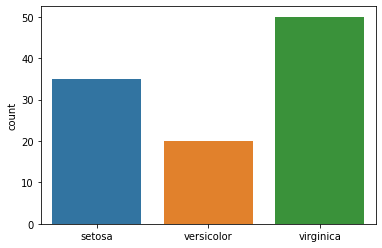

In [ ]:
# histogram
irisplot1 = sns.countplot(y3)
irisplot1.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.show()

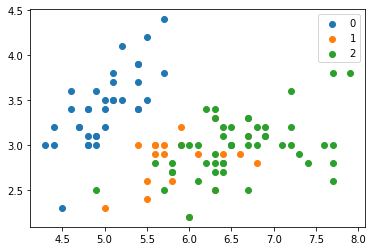

In [ ]:
# scatter plot

for label, _ in count_class.items():
	row = where(y3 == label)[0]
	pyplot.scatter(X3[row, 0], X3[row, 1], label=str(label))
 
pyplot.legend()
pyplot.show()

In [ ]:
#train and test sets
#test size factor
TS = 0.50
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=TS, stratify=y3)

###3.2.1 XGBClassifier - Imbalanced Dataset

In [ ]:
#create & fit the model
XGBC = XGBClassifier()
XGBC.fit(X3_train, y3_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Predictions
y3_predA = XGBC.predict(X3_test)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred,))
print('Precision: %.3f' % precision_score(y3_test, y3_pred, average='macro'))
print('Recall: %.3f' % recall_score(y3_test, y3_pred, average="macro"))
print('F-measure: %.3f' % f1_score(y3_test, y3_pred, average="macro"))

Accuracy: 0.981
Precision: 0.987
Recall: 0.967
F-measure: 0.976


###3.2.2 Logistic Regression - Imbalanced Dataset

In [ ]:
#create model
LR = LogisticRegression(solver='liblinear')
#fit the model
LR.fit(X3_train, y3_train)

LogisticRegression(solver='liblinear')

In [ ]:
#predictions
y3_predB = LR.predict(X3_test)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred,))
print('Precision: %.3f' % precision_score(y3_test, y3_pred, average='macro'))
print('Recall: %.3f' % recall_score(y3_test, y3_pred, average='macro'))
print('F-measure: %.3f' % f1_score(y3_test, y3_pred, average='macro'))

Accuracy: 0.981
Precision: 0.987
Recall: 0.967
F-measure: 0.976


###3.2.3 Support Vector Machine - Imbalanced Dataset

In [ ]:
svm = SVC(C=0.5, kernel='linear')
#fit the model 
svm.fit(X3_train, y3_train)

SVC(C=0.5, kernel='linear')

In [ ]:
#predictions
y3_predC = svm.predict(X3_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred,))
print('Precision: %.3f' % precision_score(y3_test, y3_pred, average='macro'))
print('Recall: %.3f' % recall_score(y3_test, y3_pred, average="macro"))
print('F-measure: %.3f' % f1_score(y3_test, y3_pred, average="macro"))

Accuracy: 0.981
Precision: 0.987
Recall: 0.967
F-measure: 0.976


###3.2.4 Gaussian Naive Bayes - Imbalanced Dataset

In [ ]:
GNB = GaussianNB()
#fit the model
GNB.fit(X3_train, y3_train)

GaussianNB()

In [ ]:
#predictions
y3_predD = GNB.predict(X3_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred,))
print('Precision: %.3f' % precision_score(y3_test, y3_pred, average='macro'))
print('Recall: %.3f' % recall_score(y3_test, y3_pred, average="macro"))
print('F-measure: %.3f' % f1_score(y3_test, y3_pred, average="macro"))

Accuracy: 0.981
Precision: 0.987
Recall: 0.967
F-measure: 0.976


###3.2.5 Random Forest - Imbalanced Dataset

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RF.fit(X3_train, y3_train)

RandomForestClassifier(random_state=1)

In [ ]:
#predictions
y3_pred = RF.predict(X3_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred,))
print('Precision: %.3f' % precision_score(y3_test, y3_pred, average='macro'))
print('Recall: %.3f' % recall_score(y3_test, y3_pred, average="macro"))
print('F-measure: %.3f' % f1_score(y3_test, y3_pred, average="macro"))

Accuracy: 0.981
Precision: 0.987
Recall: 0.967
F-measure: 0.976


## **3.3 Undersample Strategy - Near Miss**

In [ ]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')

# fit and apply the transform
X3_under, y3_under = undersample.fit_resample(X3, y3)

# verify class distribution
print(Counter(y3_under))

Counter({0: 20, 1: 20, 2: 20})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


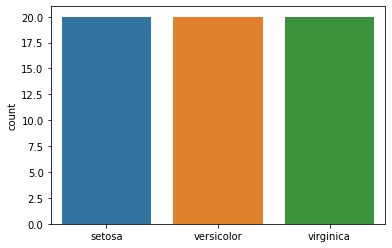

In [ ]:
# histogram
irisplot2 = sns.countplot(y3_under)
irisplot2.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.show()

### 3.3.1 XGBClassifier - Undersampling Near Miss

In [ ]:
#fit the model
XGB4u = XGBClassifier()
XGB4u.fit(X3_Utrain, y3_Utrain)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Predictions
y3_predu5 = XGB4u.predict(X3_Utest)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Utest, y3_predu5))
print('Precision: %.3f' % precision_score(y3_Utest, y3_predu5, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Utest, y3_predu5, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Utest, y3_predu5, average="weighted"))

Accuracy: 0.900
Precision: 0.923
Recall: 0.900
F-measure: 0.898


###3.3.2 Logistic Regression - Undersampling Near Miss

In [ ]:
# train and test sets
# test size factor
TS = 0.50
X3_Utrain, X3_Utest, y3_Utrain, y3_Utest = train_test_split(X3_under, y3_under, test_size=TS, stratify=y3_under)

In [ ]:
# create model
LRiu = LogisticRegression(solver='liblinear')
# fit model
LRiu.fit(X3_Utrain, y3_Utrain)

LogisticRegression(solver='liblinear')

In [ ]:
# predictions
y3_predu1= LRiu.predict(X3_Utest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Utest, y3_predu1))
print('Precision: %.3f' % precision_score(y3_Utest, y3_predu1, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Utest, y3_predu1, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Utest, y3_predu1, average="weighted"))

Accuracy: 0.933
Precision: 0.944
Recall: 0.933
F-measure: 0.933


### 3.3.3 Support Vector Machine - Undersampling Near Miss




In [ ]:
svmiu = SVC(C=0.5, kernel='linear')
#fit the model 
svmiu.fit(X3_Utrain, y3_Utrain)

SVC(C=0.5, kernel='linear')

In [ ]:
#predictions
y3_predu2 = svmiu.predict(X3_Utest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Utest, y3_predu2))
print('Precision: %.3f' % precision_score(y3_Utest, y3_predu2, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Utest, y3_predu2, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Utest, y3_predu2, average="weighted"))

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-measure: 1.000


### 3.3.4 Gaussian Naive Bayes - Undersampling Near Miss




In [ ]:
GNBiu = GaussianNB()
#fit the model
GNBiu.fit(X3_Utrain, y3_Utrain)

GaussianNB()

In [ ]:
#predictions
y3_predu3 = GNBiu.predict(X3_Utest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Utest, y3_predu3))
print('Precision: %.3f' % precision_score(y3_Utest, y3_predu3, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Utest, y3_predu3, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Utest, y3_predu3, average="weighted"))

Accuracy: 0.933
Precision: 0.944
Recall: 0.933
F-measure: 0.933


### 3.3.5 Random Forest - Undersampling Near Miss


In [ ]:
RFiu = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RFiu.fit(X3_Utrain, y3_Utrain)

RandomForestClassifier(random_state=1)

In [ ]:
#predictions
y3_predu4 = RFiu.predict(X3_Utest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Utest, y3_predu4))
print('Precision: %.3f' % precision_score(y3_Utest, y3_predu4, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Utest, y3_predu4, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Utest, y3_predu4, average="weighted"))

Accuracy: 0.933
Precision: 0.944
Recall: 0.933
F-measure: 0.933


## **3.4 Oversampling**

In [ ]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [ ]:
# instantiating the random oversampler
ros = RandomOverSampler(sampling_strategy='not majority') 
# resampling X, y
X3_over, y3_over = ros.fit_resample(X3, y3)
# new class distribution
print(Counter(y3_over))


Counter({0: 50, 1: 50, 2: 50})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


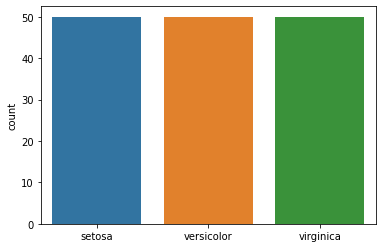

In [ ]:
# histogram
irisplot3 = sns.countplot(y3_over)
irisplot3.set_xticklabels(['setosa', 'versicolor', 'virginica'])
plt.show()

In [ ]:
# train and test sets
# test size factor
TS = 0.50
X3_Otrain, X3_Otest, y3_Otrain, y3_Otest = train_test_split(X3_over, y3_over, test_size=TS, stratify=y3_over)

###3.4.1 XGBClassifier - Oversample Strategy

In [ ]:
#fit the model
XGB3o = XGBClassifier()
XGB3o.fit(X3_Otrain, y3_Otrain)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Predictions
y3_predo5 = XGB3o.predict(X3_Otest)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Otest, y3_predo5))
print('Precision: %.3f' % precision_score(y3_Otest, y3_predo5, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Otest, y3_predo5, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Otest, y3_predo5, average="weighted"))

Accuracy: 0.987
Precision: 0.987
Recall: 0.987
F-measure: 0.987


###3.4.2 Logistic Regression - Oversample Strategy

In [ ]:
# create model
LRio = LogisticRegression(solver='liblinear')
# fit model
LRio.fit(X3_Otrain, y3_Otrain)

LogisticRegression(solver='liblinear')

In [ ]:
# predictions
y3_predo1 = LRcco.predict(X3_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Otest, y3_predo1))
print('Precision: %.3f' % precision_score(y3_Otest, y3_predo1, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Otest, y3_predo1, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Otest, y3_predo1, average="weighted"))

Accuracy: 0.907
Precision: 0.917
Recall: 0.907
F-measure: 0.906


### 3.4.3 Support Vector Machine - Oversample Strategy

In [ ]:
svmio = SVC(C=0.5, kernel='linear')
#fit the model 
svmio.fit(X3_Otrain, y3_Otrain)

SVC(C=0.5, kernel='linear')

In [ ]:
#predictions
y3_predo2 = svmio.predict(X3_Otest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Otest, y3_predo2))
print('Precision: %.3f' % precision_score(y3_Otest, y3_predo2, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Otest, y3_predo2, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Otest, y3_predo2, average="weighted"))

Accuracy: 0.960
Precision: 0.964
Recall: 0.960
F-measure: 0.960


### 3.4.4 Gaussian Naive Bayes - Oversample Strategy

In [ ]:
GNBio = GaussianNB()
#fit the model
GNBio.fit(X3_Otrain, y3_Otrain)

GaussianNB()

In [ ]:
#predictions
y3_predo3 = GNBio.predict(X3_Otest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Otest, y3_predo3))
print('Precision: %.3f' % precision_score(y3_Otest, y3_predo3, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Otest, y3_predo3, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Otest, y3_predo3, average="weighted"))

Accuracy: 0.960
Precision: 0.960
Recall: 0.960
F-measure: 0.960


### 3.4.5 Random Forest - Oversample Strategy

In [ ]:
RFio = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RFio.fit(X3_Otrain, y3_Otrain)

RandomForestClassifier(random_state=1)

In [ ]:
#predictions
y3_predo4 = RFio.predict(X3_Otest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_Otest, y3_predo4))
print('Precision: %.3f' % precision_score(y3_Otest, y3_predo4, average="weighted"))
print('Recall: %.3f' % recall_score(y3_Otest, y3_predo4, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_Otest, y3_predo4, average="weighted"))

Accuracy: 0.987
Precision: 0.987
Recall: 0.987
F-measure: 0.987


##**3.5 Penalise Algorithm**

In [ ]:
# using original dataset
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.5, stratify=y3)

###3.5.1 Logistic Regression Penalise Algorithm

In [ ]:
# define model
modelip = LogisticRegression(solver='lbfgs', class_weight='balanced')
modelip.fit(X3_train, y3_train)

In [ ]:
# predictions
y3_predp1 = modelip.predict(X3_test)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_predp1))
print('Precision: %.3f' % precision_score(y3_test, y3_predp1, average="weighted"))
print('Recall: %.3f' % recall_score(y3_test, y3_predp1, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_test, y3_predp1, average="weighted"))

Accuracy: 0.943
Precision: 0.946
Recall: 0.943
F-measure: 0.944


###3.5.2 Support Vector Machine Penalise Algorithm

In [ ]:
# Penalized-SVM
svc_model = SVC(class_weight='balanced', probability=True)

# fit model
svc_model.fit(X3_train, y3_train)

# predictions
svc_predict = svc_model.predict(X3_test)
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred,))
print('Precision: %.3f' % precision_score(y3_test, y3_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y3_test, y3_pred, average="weighted"))
print('F-measure: %.3f' % f1_score(y3_test, y3_pred, average="weighted"))

Accuracy: 0.415
Precision: 0.414
Recall: 0.415
F-measure: 0.414


###3.5.3 Random Forest Penalise Algorithm

In [ ]:
RFip = RandomForestClassifier(random_state=1, n_estimators=100, class_weight='balanced')
#fit the model
RFip.fit(X3_train, y3_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [ ]:
#predictions
y3_predp3 = RFip.predict(X3_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_predp3))
print('Precision: %.3f' % precision_score(y3_test, y3_predp3, average='weighted'))
print('Recall: %.3f' % recall_score(y3_test, y3_predp3, average='weighted'))
print('F-measure: %.3f' % f1_score(y3_test, y3_predp3, average='weighted'))

Accuracy: 0.981
Precision: 0.982
Recall: 0.981
F-measure: 0.981


##**3.6 Tables of Results from Different Classifiers**

### 4.5.1 Imbalanced Dataset

In [ ]:
model_names = ['XGBoost', 'LogReg', 'SVM', 'GNB', 'RF']

acci= [0.981, 0.981, 0.981, 0.981, 0.981]
preci= [0.987, 0.987, 0.987, 0.987, 0.987]
reci= [0.967, 0.967, 0.967, 0.967, 0.967]
fi= [0.976, 0.976, 0.976, 0.976, 0.976]

dirisi = {'Model_Names': model_names, 'accuracy': acci, 'precision' : preci, 'recall' : reci, 'f_score' : fi}
dfirisit = pd.DataFrame(data=dirisi)
print('The table for the imbalanced data is:')
dfirisit

The table for the imbalanced data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.981,0.987,0.967,0.976
1,LogReg,0.981,0.987,0.967,0.976
2,SVM,0.981,0.987,0.967,0.976
3,GNB,0.981,0.987,0.967,0.976
4,RF,0.981,0.987,0.967,0.976


### 4.5.2 Undersampling 

In [ ]:
accu= [0.9, 0.933, 1, 0.933, 0.933]
precu= [0.923, 0.944, 1, 0.944, 0.944]
recu= [0.9, 0.933, 1, 0.933, 0.933]
fu= [0.898, 0.933, 1, 0.933, 0.933]

dirisu = {'Model_Names': model_names, 'accuracy': accu, 'precision' : precu, 'recall' : recu, 'f_score' : fu}
dfirisut = pd.DataFrame(data=dirisu)
print('The table for the undersampled data is:')
dfirisut

The table for the undersampled data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.900,0.923,0.900,0.898
1,LogReg,0.933,0.944,0.933,0.933
2,SVM,1.000,1.000,1.000,1.000
3,GNB,0.933,0.944,0.933,0.933
4,RF,0.933,0.944,0.933,0.933


### 4.5.3 Oversample

In [ ]:
acco= [0.987, 0.907, 0.96, 0.96, 0.987]
preco= [0.987, 0.917, 0.964, 0.96, 0.987]
reco= [0.987, 0.907, 0.96, 0.96, 0.987]
fo= [0.987, 0.906, 0.96, 0.96, 0.987]

diriso = {'Model_Names': model_names, 'accuracy': acco, 'precision' : preco, 'recall' : reco, 'f_score' : fo}
dfirisot = pd.DataFrame(data=diriso)
print('The table for the oversampled data is:')
dfirisot

The table for the oversampled data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.987,0.987,0.987,0.987
1,LogReg,0.907,0.917,0.907,0.906
2,SVM,0.960,0.964,0.960,0.960
3,GNB,0.960,0.960,0.960,0.960
4,RF,0.987,0.987,0.987,0.987


### 4.5.4 Penalise Algorithm

In [ ]:
model_names1 = [ 'LogReg', 'SVM',  'RF']
accp= [0.943, 0.415, 0.981]
precp= [0.946, 0.414, 0.982]
recp= [0.943, 0.415, 0.981]
fp= [0.944, 0.414, 0.981]

dirisp = {'Model_Names': model_names1, 'accuracy': accp, 'precision' : precp, 'recall' : recp, 'f_score' : fp}
dfirispt = pd.DataFrame(data=dirisp)
print('The table for the imbalanced data is:')
dfirispt

The table for the imbalanced data is:


,Model_Names,accuracy,precision,recall,f_score
0,LogReg,0.943,0.946,0.943,0.944
1,SVM,0.415,0.414,0.415,0.414
2,RF,0.981,0.982,0.981,0.981


# **4. Imbalanced Credit Card Dataset**

**Credit card fraud detection**

The task is to predict whether the credit card transaction was fraudulent or not.

* Generally, the fraud transaction is about 6% of the total credit card transactions.

* If you use the dataset as it is, you could get about 94% accuracy, but as you surely guess, this accuracy is misleading.

## **4.1 Data Preperation**

### Load credit card dataset


Download the dataset from [GitHub](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5).

Note: files are zipped.

In [ ]:
# add the path to the dataset, either from your local or cloud drive
path = '/content/data/'

In [ ]:
# load the dataset
filename = 'creditcard.csv'
dfcc = pd.read_csv(path+filename)

In [ ]:
# show first rows
dfcc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# check null values
dfcc.isnull().sum().max()

print(len(dfcc))

# 1 null row, must remove
df1cc = dfcc.dropna()
print(len(df1cc))

# null row removed

86745
86744


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


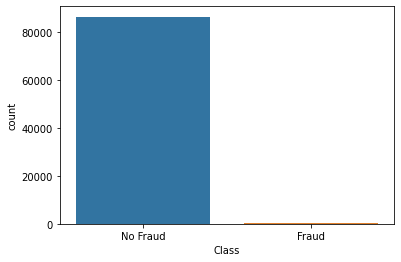

In [ ]:
#visualising target variable
P = sns.countplot(df1cc['Class'])
P.set_xticklabels(['No Fraud','Fraud'])
plt.show()

In [ ]:
# percentage of samples in both classes
# print imbalanced dataset information
print('No Fraud', round(df1cc['Class'].value_counts()[0]/len(df1cc) * 100,2), '% of total samples')
print('Fraud', round(df1cc['Class'].value_counts()[1]/len(df1cc) * 100,2), '% of total samples')

No Fraud 99.76 % of total samples
Fraud 0.24 % of total samples


In [ ]:
# descriptive statistics
df1cc.describe()

# most of the data is scaled apart from amount and time

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000,86744.000000
mean,39080.909757,-0.264394,-0.039395,0.679476,0.163191,-0.277579,0.094432,-0.110504,0.054038,-0.024221,-0.030677,0.268429,-0.110345,0.029272,0.075711,0.177367,-0.007561,0.067895,-0.096510,-0.023421,0.041844,-0.029359,-0.105765,-0.037336,0.009544,0.132807,0.026706,0.000936,0.002139,98.388368,0.002363
std,15801.511779,1.878162,1.668334,1.361668,1.361492,1.372615,1.302712,1.234742,1.219015,1.132859,1.068995,1.075499,1.155714,1.052991,0.991417,0.933677,0.909212,0.973257,0.853595,0.819713,0.767930,0.730129,0.635299,0.624832,0.594799,0.441286,0.496947,0.390614,0.328321,267.643590,0.048556
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-19.902611,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,31805.750000,-1.027862,-0.602920,0.184456,-0.720535,-0.897257,-0.645231,-0.602851,-0.140669,-0.691649,-0.503096,-0.511577,-0.540976,-0.666077,-0.329077,-0.378137,-0.483953,-0.395038,-0.569891,-0.518663,-0.170007,-0.223675,-0.525249,-0.178041,-0.321918,-0.131657,-0.326138,-0.063557,-0.005892,7.680000,0.000000
50%,41480.000000,-0.260719,0.070409,0.762704,0.186133,-0.312091,-0.155367,-0.072132,0.070501,-0.099699,-0.095234,0.201379,0.088870,0.007634,0.086472,0.282169,0.064893,0.008861,-0.087972,-0.027577,-0.025207,-0.057631,-0.081393,-0.049836,0.065004,0.171228,-0.071984,0.009355,0.023013,26.990000,0.000000
75%,51412.000000,1.152668,0.726129,1.389882,1.040338,0.257044,0.488732,0.417938,0.353062,0.597347,0.442022,1.080235,0.609943,0.712386,0.510552,0.850734,0.542372,0.472401,0.389721,0.481177,0.170806,0.118668,0.309845,0.080863,0.406048,0.420572,0.306638,0.082666,0.076182,89.900000,0.000000
max,61374.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


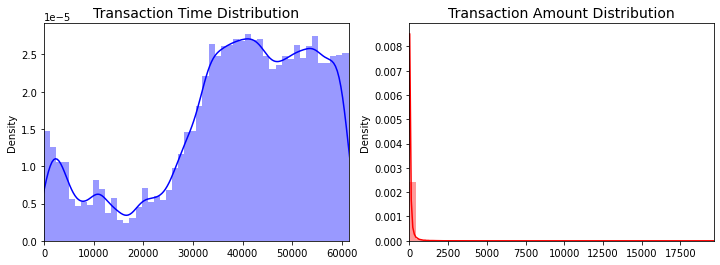

In [ ]:
# distributions of time and amount

fig, ax = plt.subplots(1, 2, figsize=(12,4))

time_feature = df1cc['Time'].values
amount_feature = df1cc['Amount'].values

sns.distplot(time_feature, ax=ax[0], color='b')
ax[0].set_title('Transaction Time Distribution', fontsize=14)
ax[0].set_xlim([min(time_feature), max(time_feature)])

sns.distplot(amount_feature, ax=ax[1], color='r')
ax[1].set_title('Transaction Amount Distribution', fontsize=14)
ax[1].set_xlim([min(amount_feature), max(amount_feature)])

plt.show()

In [ ]:
df1cc['Class'].value_counts()

0.0    86539
1.0      205
Name: Class, dtype: int64

In [ ]:
X4 = df1cc.copy()

X4.drop(['Class'], axis=1, inplace=True) 

y4 = df1cc['Class']

In [ ]:
#train and test sets
#test size factor
TS4 = 0.50
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=TS4, stratify=y4)

### 4.1.1 XGBoost

In [ ]:
#create model
from xgboost import XGBClassifier

#fit the model
XGB4 = XGBClassifier()
XGB4.fit(X4_train, y4_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predictions
y4_pred5 = XGB4.predict(X4_test)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred5))
print('Precision: %.3f' % precision_score(y4_test, y4_pred5))
print('Recall: %.3f' % recall_score(y4_test, y4_pred5))
print('F-measure: %.3f' % f1_score(y4_test, y4_pred5))

Accuracy: 1.000
Precision: 0.929
Recall: 0.902
F-measure: 0.915


### 4.1.2 Logistic Regression

In [ ]:
LRcci = LogisticRegression(solver='liblinear')
# fit model
LRcci.fit(X4_train, y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y4_pred = LRcci.predict(X4_test)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred))
print('Precision: %.3f' % precision_score(y4_test, y4_pred))
print('Recall: %.3f' % recall_score(y4_test, y4_pred))
print('F-measure: %.3f' % f1_score(y4_test, y4_pred))

Accuracy: 0.999
Precision: 0.793
Recall: 0.637
F-measure: 0.707


### 4.1.3 Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svmcc = SVC(C=0.5, kernel='linear')
#fit the model 
svmcc.fit(X4_train, y4_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions
y4_pred2 = svmcc.predict(X4_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred2))
print('Precision: %.3f' % precision_score(y4_test, y4_pred2))
print('Recall: %.3f' % recall_score(y4_test, y4_pred2))
print('F-measure: %.3f' % f1_score(y4_test, y4_pred2))

Accuracy: 0.998
Precision: 0.727
Recall: 0.471
F-measure: 0.571


### 4.1.4 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNBcc = GaussianNB()
#fit the model
GNBcc.fit(X4_train, y4_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predictions
y4_pred3 = GNBcc.predict(X4_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred3))
print('Precision: %.3f' % precision_score(y4_test, y4_pred3))
print('Recall: %.3f' % recall_score(y4_test, y4_pred3))
print('F-measure: %.3f' % f1_score(y4_test, y4_pred3))

Accuracy: 0.984
Precision: 0.118
Recall: 0.902
F-measure: 0.209


### 4.1.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFcc = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RFcc.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y4_pred4 = RFcc.predict(X4_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred4))
print('Precision: %.3f' % precision_score(y4_test, y4_pred4))
print('Recall: %.3f' % recall_score(y4_test, y4_pred4))
print('F-measure: %.3f' % f1_score(y4_test, y4_pred4))

Accuracy: 1.000
Precision: 0.938
Recall: 0.892
F-measure: 0.915


## **4.2 Undersampling**

In [ ]:
## undersample strategy

# undersample larger class
factorcc1 = 0.5
undersample = RandomUnderSampler(sampling_strategy=factorcc1)
# fit and apply the transform
X4_under, y4_under = undersample.fit_resample(X4, y4)
# verify class distribution
print(Counter(y4_under))

Counter({0.0: 410, 1.0: 205})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


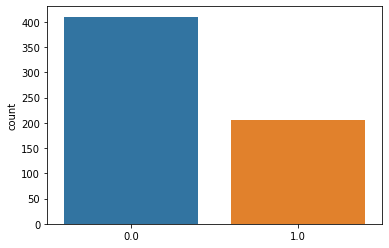

In [ ]:



# histogram
sns.countplot(y4_under)

In [ ]:
# train and test sets
# test size factor
TS = 0.50
X4_Utrain, X4_Utest, y4_Utrain, y4_Utest = train_test_split(X4_under, y4_under, test_size=TS, stratify=y4_under)

### 4.2.1 XGBoost Undersampling

In [ ]:
#fit the model
XGB4u = XGBClassifier()
XGB4u.fit(X4_Utrain, y4_Utrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predictions
y4_predu5 = XGB4u.predict(X4_Utest)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Utest, y4_predu5))
print('Precision: %.3f' % precision_score(y4_Utest, y4_predu5))
print('Recall: %.3f' % recall_score(y4_Utest, y4_predu5))
print('F-measure: %.3f' % f1_score(y4_Utest, y4_predu5))

Accuracy: 0.961
Precision: 0.979
Recall: 0.903
F-measure: 0.939


### 4.2.2 Logistic Regression Undersampling

In [ ]:
# create model
LRccu = LogisticRegression(solver='liblinear')
# fit model
LRccu.fit(X4_Utrain, y4_Utrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y4_predu1= LRccu.predict(X4_Utest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Utest, y4_predu1))
print('Precision: %.3f' % precision_score(y4_Utest, y4_predu1))
print('Recall: %.3f' % recall_score(y4_Utest, y4_predu1))
print('F-measure: %.3f' % f1_score(y4_Utest, y4_predu1))

Accuracy: 0.958
Precision: 1.000
Recall: 0.874
F-measure: 0.933


### 4.2.3 Support Vector Machine Undersampling




In [ ]:
svmccu = SVC(C=0.5, kernel='linear')
#fit the model 
svmccu.fit(X4_Utrain, y4_Utrain)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions
y4_predu2 = svmccu.predict(X4_Utest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Utest, y4_predu2))
print('Precision: %.3f' % precision_score(y4_Utest, y4_predu2))
print('Recall: %.3f' % recall_score(y4_Utest, y4_predu2))
print('F-measure: %.3f' % f1_score(y4_Utest, y4_predu2))

Accuracy: 0.938
Precision: 0.988
Recall: 0.825
F-measure: 0.899


### 4.2.4 Gaussian Naive Bayes Undersampling




In [ ]:
GNBccu = GaussianNB()
#fit the model
GNBccu.fit(X4_Utrain, y4_Utrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predictions
y4_predu3 = GNBccu.predict(X4_Utest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Utest, y4_predu3))
print('Precision: %.3f' % precision_score(y4_Utest, y4_predu3))
print('Recall: %.3f' % recall_score(y4_Utest, y4_predu3))
print('F-measure: %.3f' % f1_score(y4_Utest, y4_predu3))

Accuracy: 0.938
Precision: 0.967
Recall: 0.845
F-measure: 0.902


### 4.2.5 Random Forest Undersampling


In [ ]:
RFccu = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RFccu.fit(X4_Utrain, y4_Utrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y4_predu4 = RFccu.predict(X4_Utest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Utest, y4_predu4))
print('Precision: %.3f' % precision_score(y4_Utest, y4_predu4))
print('Recall: %.3f' % recall_score(y4_Utest, y4_predu4))
print('F-measure: %.3f' % f1_score(y4_Utest, y4_predu4))

Accuracy: 0.958
Precision: 1.000
Recall: 0.874
F-measure: 0.933


## **4.3 Oversampling**

In [ ]:
## oversample strategy

# oversample shorter class
factorcc2 = 0.5
oversample = SMOTE(sampling_strategy=factorcc2)
# fit and apply the transform
X4_over, y4_over = oversample.fit_resample(X4, y4)
# verify class distribution
print(Counter(y4_over))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 86539, 1.0: 43269})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


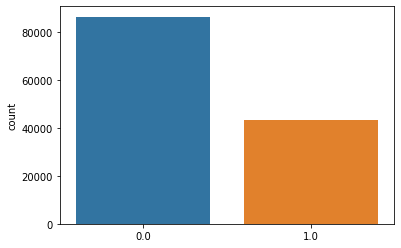

In [ ]:




# histogram
sns.countplot(y4_over)

In [ ]:
# train and test sets
# test size factor
TS = 0.50
X4_Otrain, X4_Otest, y4_Otrain, y4_Otest = train_test_split(X4_over, y4_over, test_size=TS, stratify=y4_over)

### 4.3.1 XGBoost Oversampling

In [ ]:
#fit the model
XGB4o = XGBClassifier()
XGB4o.fit(X4_Otrain, y4_Otrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predictions
y4_predo5 = XGB4o.predict(X4_Otest)
#evaulate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Otest, y4_predo5))
print('Precision: %.3f' % precision_score(y4_Otest, y4_predo5))
print('Recall: %.3f' % recall_score(y4_Otest, y4_predo5))
print('F-measure: %.3f' % f1_score(y4_Otest, y4_predo5))

Accuracy: 0.997
Precision: 0.998
Recall: 0.992
F-measure: 0.995


### 4.3.2 Logistic Regression Oversampling

In [ ]:
# create model
LRcco = LogisticRegression(solver='liblinear')
# fit model
LRcco.fit(X4_Otrain, y4_Otrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y4_predo1 = LRcco.predict(X4_Otest)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Otest, y4_predo1))
print('Precision: %.3f' % precision_score(y4_Otest, y4_predo1))
print('Recall: %.3f' % recall_score(y4_Otest, y4_predo1))
print('F-measure: %.3f' % f1_score(y4_Otest, y4_predo1))

Accuracy: 0.963
Precision: 0.989
Recall: 0.898
F-measure: 0.941


### 4.3.3 Support Vector Machine Oversampling

In [ ]:
from sklearn.svm import SVC
svmcco = SVC(C=0.5, kernel='linear')
#fit the model 
svmcco.fit(X4_Otrain, y4_Otrain)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions
y4_predo2 = svmcco.predict(X4_Otest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Otest, y4_predo2))
print('Precision: %.3f' % precision_score(y4_Otest, y4_predo2))
print('Recall: %.3f' % recall_score(y4_Otest, y4_predo2))
print('F-measure: %.3f' % f1_score(y4_Otest, y4_predo2))

Accuracy: 0.974
Precision: 0.995
Recall: 0.925
F-measure: 0.959


### 4.3.4 Gaussian Naive Bayes Oversampling

In [ ]:
GNBcco = GaussianNB()
#fit the model
GNBcco.fit(X4_Otrain, y4_Otrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predictions
y4_predo3 = GNBcco.predict(X4_Otest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Otest, y4_predo3))
print('Precision: %.3f' % precision_score(y4_Otest, y4_predo3))
print('Recall: %.3f' % recall_score(y4_Otest, y4_predo3))
print('F-measure: %.3f' % f1_score(y4_Otest, y4_predo3))

Accuracy: 0.955
Precision: 0.971
Recall: 0.891
F-measure: 0.929


### 4.3.5 Random Forest Oversampling

In [ ]:
RFcco = RandomForestClassifier(random_state=1, n_estimators=100)
#fit the model
RFcco.fit(X4_Otrain, y4_Otrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y4_predo4 = RFcco.predict(X4_Otest)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_Otest, y4_predo4))
print('Precision: %.3f' % precision_score(y4_Otest, y4_predo4))
print('Recall: %.3f' % recall_score(y4_Otest, y4_predo4))
print('F-measure: %.3f' % f1_score(y4_Otest, y4_predo4))

Accuracy: 1.000
Precision: 0.999
Recall: 1.000
F-measure: 0.999


## **4.4 Penalise Algorithm**

### 4.4.1 Logistic Regression Penalise Algorithm

In [ ]:
# define model

modelccp = LogisticRegression(solver='lbfgs', class_weight='balanced')

modelccp.fit(X4_train, y4_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='weights', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y4_predp1 = modelccp.predict(X4_test)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_predp1))
print('Precision: %.3f' % precision_score(y4_test, y4_predp1))
print('Recall: %.3f' % recall_score(y4_test, y4_predp1))
print('F-measure: %.3f' % f1_score(y4_test, y4_predp1))



Accuracy: 0.999
Precision: 0.735
Recall: 0.699
F-measure: 0.716


### 4.4.2 Support Vector Machine Penalise Algorithm

In [ ]:
# Train model
svmccp = SVC(class_weight='balanced', probability=True)
 
svmccp.fit(X4_train, y4_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#predictions
y4_predp2 = svmccp.predict(X4_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_predp2))
print('Precision: %.3f' % precision_score(y4_test, y4_predp2))
print('Recall: %.3f' % recall_score(y4_test, y4_predp2))
print('F-measure: %.3f' % f1_score(y4_test, y4_predp2))

Accuracy: 0.858
Precision: 0.007
Recall: 0.388
F-measure: 0.013


### 4.4.3 Random Forest Penalise Algorithm 

In [ ]:
RFccp = RandomForestClassifier(random_state=1, n_estimators=100, class_weight='balanced')
#fit the model
RFccp.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predictions
y4_predp3 = RFccp.predict(X4_test)
#evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_predp3))
print('Precision: %.3f' % precision_score(y4_test, y4_predp3))
print('Recall: %.3f' % recall_score(y4_test, y4_predp3))
print('F-measure: %.3f' % f1_score(y4_test, y4_predp3))

Accuracy: 1.000
Precision: 0.977
Recall: 0.816
F-measure: 0.889


## **4.5 Tables of model scores**

### 4.5.1 Imbalanced Data set

In [ ]:
model_names = ['XGBoost', 'LogReg', 'SVM', 'GNB', 'RF']

acci= [1,0.999,0.998,0.984,1]
preci=[0.929,0.793,0.727,0.118,0.938]
reci=[0.902,0.637,0.471,0.902,0.892]
fi=[0.915,0.707,0.571,0.209,0.915]

dcci = {'Model_Names': model_names, 'accuracy': acci, 'precision' : preci, 'recall' : reci, 'f_score' : fi}
dfccit = pd.DataFrame(data=dcci)
print('The table for the imbalanced data is:')
dfccit


The table for the imbalanced data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,1.000,0.929,0.902,0.915
1,LogReg,0.999,0.793,0.637,0.707
2,SVM,0.998,0.727,0.471,0.571
3,GNB,0.984,0.118,0.902,0.209
4,RF,1.000,0.938,0.892,0.915


### 4.5.2 Undersampling 

In [ ]:
accu= [0.961,0.958,0.938,0.938,0.958]
precu=[0.979,1,0.988,0.697,1]
recu=[0.903,0.874,0.825,0.845,0.874]
fu=[0.939,0.933,0.899,0.902,0.933]

dccu = {'Model_Names': model_names, 'accuracy': accu, 'precision' : precu, 'recall' : recu, 'f_score' : fu}
dfccut = pd.DataFrame(data=dccu)
print('The table for the undersample data is:')
dfccut

The table for the undersample data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.961,0.979,0.903,0.939
1,LogReg,0.958,1.000,0.874,0.933
2,SVM,0.938,0.988,0.825,0.899
3,GNB,0.938,0.697,0.845,0.902
4,RF,0.958,1.000,0.874,0.933


### 4.5.3 Oversample

In [ ]:
acco= [0.997,0.963,0.974,0.955,1]
preco=[0.998,0.989,0.995,0.971,0.999]
reco=[0.992,0.898,0.925,0.891,1]
fo=[0.995,0.941,0.959,0.929,0.999]

dcco = {'Model_Names': model_names, 'accuracy': acco, 'precision' : preco, 'recall' : reco, 'f_score' : fo}
dfccot = pd.DataFrame(data=dcco)
print('The table for the oversample data is:')
dfccot

The table for the oversample data is:


,Model_Names,accuracy,precision,recall,f_score
0,XGBoost,0.997,0.998,0.992,0.995
1,LogReg,0.963,0.989,0.898,0.941
2,SVM,0.974,0.995,0.925,0.959
3,GNB,0.955,0.971,0.891,0.929
4,RF,1.000,0.999,1.000,0.999


### 4.5.4 Penalise Algorithm

In [ ]:
model_names1 = [ 'LogReg', 'SVM',  'RF']
accp= [0.999,0.858,1]
precp=[0.735, 0.007,0.977]
recp=[0.699,0.388,0.816]
fp=[0.716,0.013,0.889]

dccp = {'Model_Names': model_names1, 'accuracy': accp, 'precision' : precp, 'recall' : recp, 'f_score' : fp}
dfccpt = pd.DataFrame(data=dccp)
print('The table for the oversample data is:')
dfccpt


The table for the oversample data is:


,Model_Names,accuracy,precision,recall,f_score
0,LogReg,0.999,0.735,0.699,0.716
1,SVM,0.858,0.007,0.388,0.013
2,RF,1.000,0.977,0.816,0.889


#**5. Summary**

##5.1 Theory

XGBoost, co-created by Tianqi Chen has grown to be one of the most efficient machine learning algorithms available. In 2016 he rendered it 10 times faster than other machine learning solutions and many this credited it due to its simplicity, robustness, scalability and consistency (Sundaram, 2021). 

Often, we see in real world data that they are split unevenly i.e., the data is imbalanced. This can be seen in the credit card fraud detection dataset whereby the majority of the observations are classified as ‘authorised transactions’ and a small percentage is classified as ‘fraud’. Running predictions form this point would be hardly different to just random guessing due to this imbalance.  Therefore, we use boosting as a method to covert these weak learners in classifying observations as ‘fraud’ to strong learners by combining the weighted averages. This is generally explained in three steps:

**Step 1.** The base learner (initial model) assigns equal weight to each observation by taking all the distributions.

**Step 2.** If there are any residuals i.e., difference between predicted and true values, a second base learner is applied.

**Step 3.** Repeat Step 2 until the maximum number of trees have been reached (default of 100 in this paper) or if optimized accuracy is achieved. 

Boosting primarily focuses more on observations that are mis-classified or have high residuals (Ray, 2015). XGBoost is quite like Random Forest as they both employ tree ensemble techniques. However, key differences exist which give XGBoost the widespread fame and recognition it has today (Gupta, 2021). XGB prunes the trees if minimal gain is derived from them which prevents overfitting compared to RF which continues to create newer models. XGB favors unbalanced datasets as it gives extra weight to the minority (combines weak learners to create a strong learner), a process that is not guaranteed in RF. XGB requires only a low number of initial hyperparameters compared to RF which favors test data with high variations. Higher preference may be given to classes with more participation within categorical variables with RF compared to XGB which can lead to less accurate predictions especially in unbalanced datasets. 

##5.2 Pros & Cons of Datasets

The iris dataset isn't all that suited to showing how to deal with imbalanced datasets, as it's naturally a balanced, small dataset. By manipulating the data, one could really distory the results. 

The credit card dataset was significantly imbalanced with 99.76% of the data in the authorised transactions class and 0.24% in the fraudulent transactions class. Therefore the imbalanced techniques needed to be used to improve the models performance. The large number of predictor variables meant that predictions were more accurate, however, this lead to a long training time particularly for the penalied support vector machine.

##5.3 Findings & Conclusions

###5.3.1 Synthetic Dataset
Accuracy is high in imbalanced set: However, using accuracy as a performance measure for highly imbalanced datasets may not be a good idea. For example, if 90% points belong to the true class in a binary classification problem, a default prediction of true for all data points leads to a classifier which is 90% accurate, even though the classifier has not learnt anything about the classification problem at hand.

The undersample dataset seems to perform worse overall than the oversample dataset. This could be due to the fact that we are disregarding a lot of samples by undersampling and therefore do not have enough data to train a good classifier.

XGBoost performs very well for the imbalanced dataset because in XGBoost when it misclassifies a sample it puts more importance on it in further iterations which helps the model classify samples in the smaller class.

XGBoost does not perform as well as some of the other models such as LogReg and SVM in the undersample dataset. 

XGBoost and Random Forest both perform really well for the oversample dataset. This could be because they are both tree-based models. Both XGBoost and Random Forest are popular for classification problems due to the high levels of accuracy they can attain.



###5.3.2 Iris Dataset
The iris dataset is an intriguing investigation here as it's 3 classed with only 150 samples. Furthermore, it's the only dataset in this paper which is naturally balanced, and had to be synthetically imbalanced for the purpose of comparison. Due to it's low sample size, making it imbalanced can particularly sway your results. 

When analysing the imbalanced results (pre any technique), the scores are relatively high, but unanimous across all 5 techniques. It's interesting how XGBoost, which is widely considered the best machine learning algorithm, appears to make the same pitfalls as the other 4. While results are high in all categories, precision is highest at .987 while recall is lowest at .967.

For undersampling, we can see the limitation of XGBoost. With less data, XGBoost performed the worst of all 3 metrics with an accuracy score of .9 and an F1 score of .898. SVM performed perfectly for undersampling, with a score of 1 in all 4 metrics.

For oversampling, XGBoost shines alongside Random Forests. Both techniques recored .987 in all 4 metrics

### 5.3.3 Credit card dataset
When analysing the scores for the credit card dataset, it is important to put more weight on precision as this measures the proportion of transactions predicted as fraudulent and were correctly identified as fraudulent. Recall is also important as this measures the proportion of transactions that were fraudulent that were correctly identified by the model. For the imbalanced dataset, the XGBoost and Random Forest (RF) models performed the best. Both models had an accuracy of 1 and an F-score of 0.915. The XGBoost had a marginally higher recall rate while the RF had a marginally higher precision which indicates that the RF is a slightly better model. The Gaussian Naïve Bayes (GNB) model was the worst performing model on this data.

After the undersampling technique was applied to the dataset, the XGBoost, logistic regression (LR) and RF models all performed well. The LR and RF models had a perfect precision score of 1, meaning that all predicted fraudulent transactions were correct and there were no false positives. The XGBoost model had the highest F-score, which is the harmonic mean of the precision and recall. The support vector machine (SVM) and GNB models were the poorest performing models as they had the lowest recall and precision respectively.

After the oversampling technique had been applied, the scores indicated that the RF model was the best performing model, slightly outperforming the XGBoost model. Both models had very high scores. The RF model had a near perfect score in all categories. The GNB was the worst performing model, having the lowest score in all categories. 

After the penalise algorithm was applied to the RF, SVM and LR models, it was clear that the RF was the best performing model as it had the highest scores in all categories. The SVM was the worst performing model and seemed to be negatively affected by the penalise algorithm.

Overall, the best performing model was the oversample RF model which had an accuracy rate of 1, precision rate of 0.999, recall rate of 1 and an F-Score of 0.999.

##5.4 Hints & Tips

When dealing with the newly imbalanced iris dataset, it was hugely beneficial to use ***sampling_strategy='not minority'*** for the undersampling. This qucikly reduced all other classes to the minority class count. Similarly, ***sampling_strategy='not majority'*** allowed us to raise the class count for the other two classes to match the majority count. 

A null row needed to be removed from the Credit card dataset in order to train the models and perform the data split. The function ***isnull().sum().max()*** was used to detect the null row and then the function ***.dropna()*** was used to remove this row.



#**6. Bibliography**

Albon, C. (2018) *Machine Learning with Python cookbook: practical solutions from preprocessing to deep learning*. First edition. Sebastopol, CA: O’Reilly Media. [accessed 11 Oct 2021].

Brownlee, J. (2021) *How to Combine Oversampling and Undersampling for Imbalanced Classification*, Machine Learning Mastery, available: https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/ [accessed 13 Oct 2021].

Brownlee, J. (2021) *Random Oversampling and Undersampling for Imbalanced Classification*, Machine Learning Mastery, available: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ [accessed 12 Oct 2021].

Brownlee, J. (2021) *Undersampling Algorithms for Imbalanced Classification*, Machine Learning Mastery, available: https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/ [accessed 12 Oct 2021].

Chen, T. and Guestrin, C., 2016. XGBoost: A Scalable Tree Boosting System. KDD, [online] Available at: <https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf> [Accessed 16 October 2021].

Gupta, A. (n.d.) *XGBoost versus Random Forest*, Geek Culture, available: https://medium.com/geekculture/xgboost-versus-random-forest-898e42870f30 [accessed 15 Oct 2021].

Madhukar, B. (2020) *Using Near-Miss Algorithm For Imbalanced Datasets*, Analytics India Magazine, available: https://analyticsindiamag.com/using-near-miss-algorithm-for-imbalanced-datasets/ [accessed 13 Oct 2021].

Muller, A.C., and Guid, S. (2016) *Introduction to Machine Learning with Python: A Guide For Data Scientists*, First edition., Sebastopol, CA: O’Reilly Media. [accessed 08 Oct 2021].

Ray, S., 2015. Quick Introduction to Boosting Algorithms in Machine Learning. [Blog] Analytics Vidhya, Available at: <https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/> [Accessed 16 October 2021].

Sundaram, R., 2021. An End-to-End Guide to Understand the Math behind XGBoost. [Blog] Analytics Vidhya, Available at: <https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/> 